# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [71]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [72]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | remire-montjoly
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | midvagur
Processing Record 5 of Set 1 | nieuw amsterdam
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | sao joao da barra
Processing Record 10 of Set 1 | stanley
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | uturoa
Processing Record 13 of Set 1 | ust-nera
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | qaqortoq
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | udachny
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | constitucion
Processing Record 21 of Set 1 | pu

In [73]:
city_weather

{'coord': {'lon': 1.4078, 'lat': 18.4411},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 28.79,
  'feels_like': 27.2,
  'temp_min': 28.79,
  'temp_max': 28.79,
  'pressure': 1012,
  'humidity': 11,
  'sea_level': 1012,
  'grnd_level': 961},
 'visibility': 10000,
 'wind': {'speed': 2.71, 'deg': 309, 'gust': 2.92},
 'clouds': {'all': 1},
 'dt': 1699558671,
 'sys': {'country': 'ML', 'sunrise': 1699509455, 'sunset': 1699550328},
 'timezone': 0,
 'id': 2455290,
 'name': 'Kidal',
 'cod': 200}

In [74]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [75]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,remire-montjoly,4.9167,-52.2667,31.02,62,100,6.17,GF,1699558705
1,yellowknife,62.4560,-114.3525,-0.88,98,100,9.26,CA,1699558559
2,longyearbyen,78.2186,15.6401,-2.09,74,75,6.17,SJ,1699558582
3,midvagur,62.0511,-7.1939,5.46,87,75,4.12,FO,1699558760
4,nieuw amsterdam,5.8833,-55.0833,34.09,59,20,3.09,SR,1699558760


In [76]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [77]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,remire-montjoly,4.9167,-52.2667,31.02,62,100,6.17,GF,1699558705
1,yellowknife,62.4560,-114.3525,-0.88,98,100,9.26,CA,1699558559
2,longyearbyen,78.2186,15.6401,-2.09,74,75,6.17,SJ,1699558582
3,midvagur,62.0511,-7.1939,5.46,87,75,4.12,FO,1699558760
4,nieuw amsterdam,5.8833,-55.0833,34.09,59,20,3.09,SR,1699558760


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

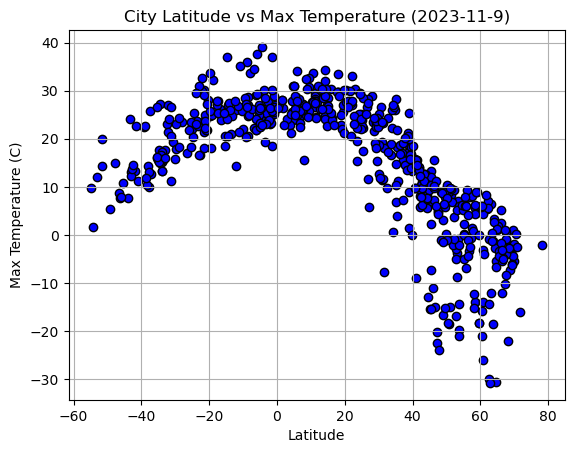

In [78]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,marker="o",facecolors='blue',edgecolors='black',)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Incorporate the other graph properties
plt.title('City Latitude vs Max Temperature (2023-11-9)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

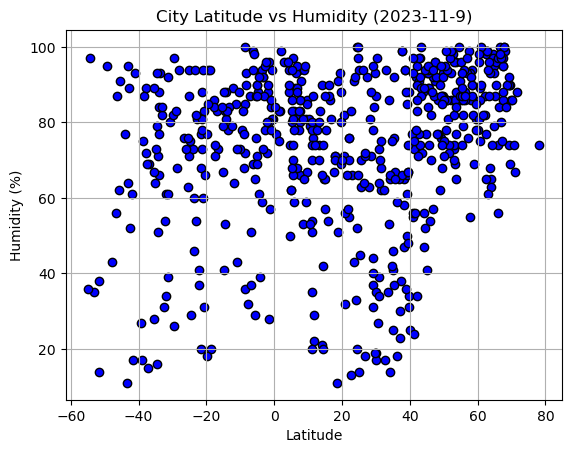

In [79]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,marker="o",facecolors='blue',edgecolors='black',)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity (2023-11-9)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

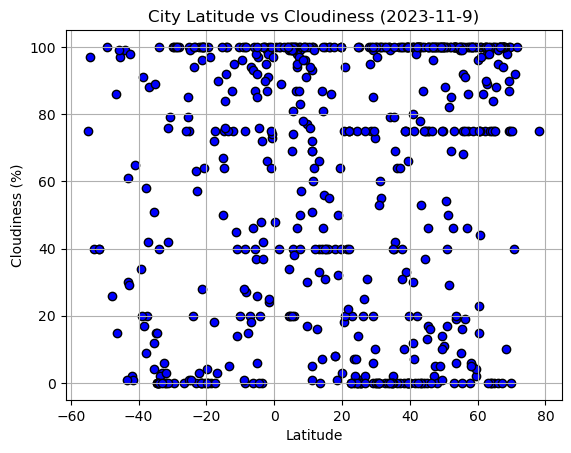

In [80]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,marker="o",facecolors='blue',edgecolors='black',)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness (2023-11-9)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

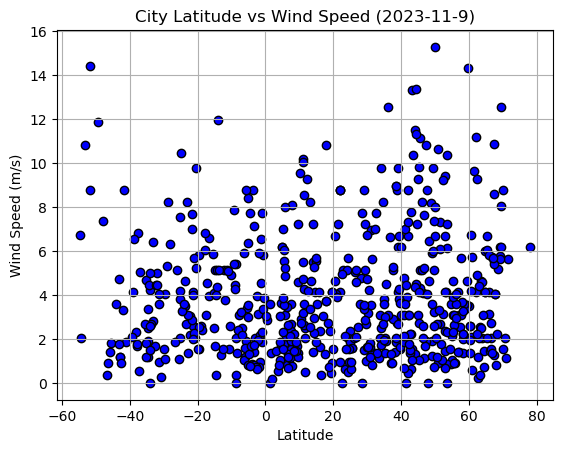

In [81]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,marker="o",facecolors='blue',edgecolors='black',)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)


# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed (2023-11-9)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [82]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values, regEQplotX, regEQplotY, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, marker="o", facecolors="blue")
    plt.plot(x_values,regress_values,"r-", linewidth=3)
    plt.grid(True)
    print(f'The r-value is {rvalue}')
    plt.annotate(line_eq,(regEQplotX,regEQplotY),color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{ylabel}')
    plt.grid() 


In [83]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)city_data_df
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float)>= 0, :]
northern_hemi_df
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,remire-montjoly,4.9167,-52.2667,31.02,62,100,6.17,GF,1699558705
1,yellowknife,62.4560,-114.3525,-0.88,98,100,9.26,CA,1699558559
2,longyearbyen,78.2186,15.6401,-2.09,74,75,6.17,SJ,1699558582
3,midvagur,62.0511,-7.1939,5.46,87,75,4.12,FO,1699558760
4,nieuw amsterdam,5.8833,-55.0833,34.09,59,20,3.09,SR,1699558760


In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float)< 0, :]
southern_hemi_df

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,port-aux-francais,-49.3500,70.2167,5.33,95,100,11.85,TF,1699558574
6,blackmans bay,-43.0167,147.3167,13.07,95,30,1.18,AU,1699558585
7,margaret river,-33.9500,115.0667,13.35,66,100,4.22,AU,1699558594
8,sao joao da barra,-21.6403,-41.0511,30.05,77,0,7.66,BR,1699558761
10,uturoa,-16.7333,-151.4333,26.21,83,3,6.57,PF,1699558643


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8324760524559693


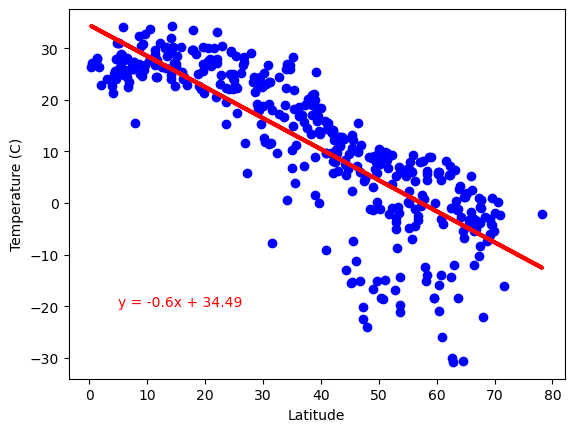

In [85]:
# Linear regression on Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Max Temp"]
linearRegression(x_plot, y_plot, 5, -20, "Temperature (C)")
plt.savefig("output_data/Fig5.png",dpi=300, bbox_inches = "tight")

The r-value is 0.685997681792818


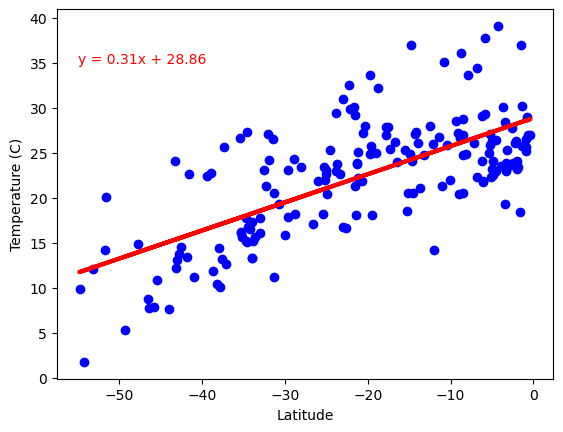

In [86]:
# Linear regression on Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Max Temp"]
linearRegression(x_plot, y_plot, -55, 35, "Temperature (C)")
plt.savefig("output_data/Fig6.png",dpi=300, bbox_inches = "tight")

Discussion about the linear relationship: 
Latitude vs Temperature - As expected, the farther away from the equator we travel, the max temperature is lower.  Both r-values are high enough to show that there is a correlation.  The r-value correlation is slightly higher in the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.2614719658313944


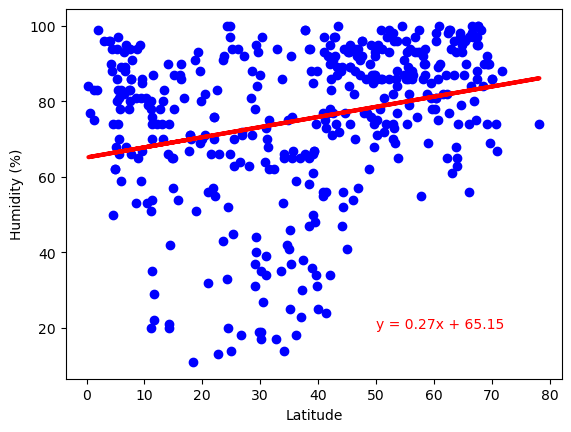

In [87]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Humidity"]
linearRegression(x_plot, y_plot, 50, 20, "Humidity (%)")
plt.savefig("output_data/Fig7.png",dpi=300, bbox_inches = "tight")

The r-value is 0.280820030700022


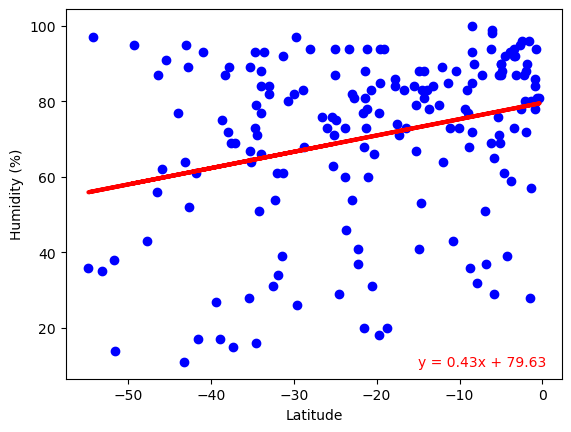

In [88]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Humidity"]
linearRegression(x_plot, y_plot, -15, 10, "Humidity (%)")
plt.savefig("output_data/Fig8.png",dpi=300, bbox_inches = "tight")

Discussion about the linear relationship: 
According to the data, there is no correlation of the level of humidity compared to the distance from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.08867287668515392


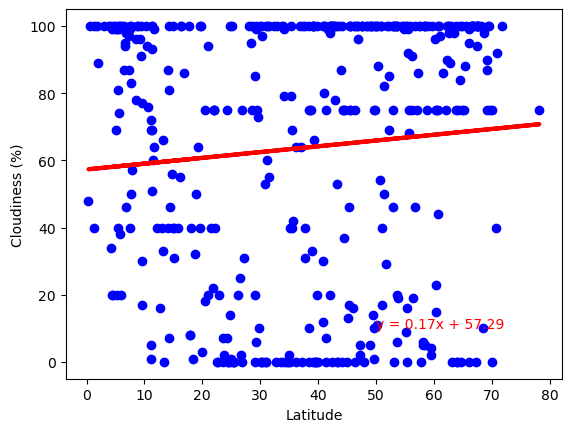

In [89]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Cloudiness"]
linearRegression(x_plot, y_plot, 50, 10, "Cloudiness (%)")
plt.savefig("output_data/Fig7.png",dpi=300, bbox_inches = "tight")

The r-value is 0.20730170173804577


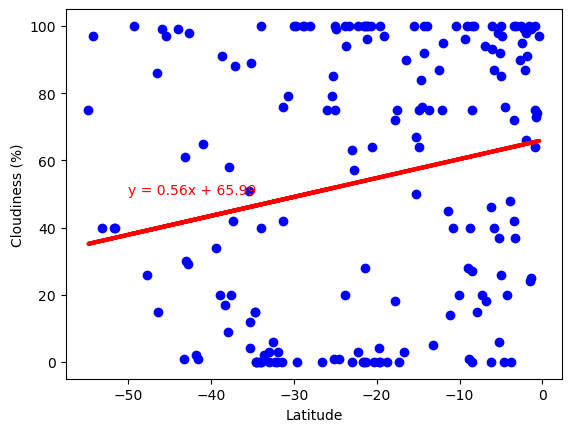

In [90]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Cloudiness"]
linearRegression(x_plot, y_plot, -50, 50, "Cloudiness (%)")
plt.savefig("output_data/Fig7.png",dpi=300, bbox_inches = "tight")

Discussion about the linear relationship:
There is a slightly higher correlation in the southern atmosphere.  But there is still no significant correlation between cloudiness and distance from the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.12407830815900184


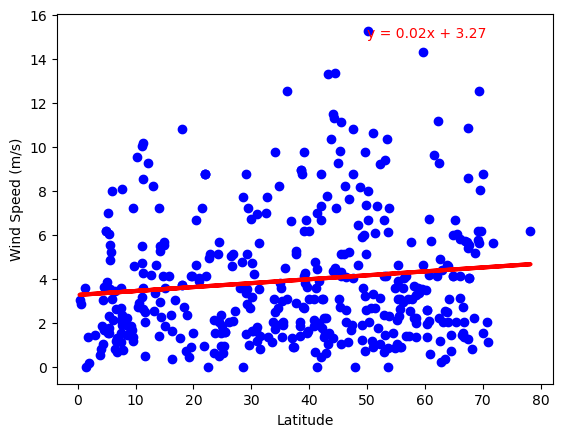

In [91]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Wind Speed"]
linearRegression(x_plot, y_plot, 50, 15, "Wind Speed (m/s)")
plt.savefig("output_data/Fig7.png",dpi=300, bbox_inches = "tight")

The r-value is -0.11200500615180621


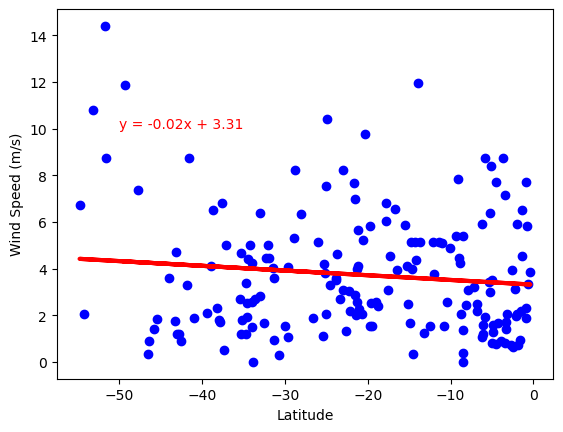

In [92]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Wind Speed"]
linearRegression(x_plot, y_plot, -50, 10, "Wind Speed (m/s)")
plt.savefig("output_data/Fig7.png",dpi=300, bbox_inches = "tight")

Discussion about the linear relationship:
According to the data, there is no correlation of the level of humidity compared to the distance from the equator.